# Univariate Newton-Raphson method

<div style="width: 100%; overflow: hidden;">
     <div style="width: 75%; float: left;"> 
         This notebook introduces Newton's method given a univariate, i.e. single variable, optimization example where it is the objective to compute $f(x)=\sqrt[b]{x}$ while $b\in\mathbb{N}$ which is considered constant. This scenario suits numerical optimization as it suffices to incrementally approach a solution posed by its inverse $f^{-1}(x)=x^b$ being an exponential function.
     <div class="alert alert-block alert-info"><b>Note:</b> The analytical solution $f(x)=\sqrt[b]{x}=x^{1/b}$ is straightforward and more elegant when implemented as <b>x**(1/b)</b> because it does not require additional libraries such that it should always be preferred over the below jaunt.
     </div>
     <br>last update: 30/09/2020
     </div>
     <div style="margin-left: 80%;">
        <b>Author</b><br><br>
        <a href='http://www.christopherhahne.de', style="text-decoration: None; text-align: left;">
            <img align="left" src="http://www.christopherhahne.de/images/about.jpg" width="78"/>
            <br><br><br><br><br><br>
            <b>Christopher<br>Hahne, PhD</b>
        </a>
    </div>
</div>

## Cost function
Optimization generally involves the definition of a cost (or loss) function prior to the actual minimization to assess each intermediate result candidate $x_k, \, k \in \mathbb{N}$ by analyzing how much it deviates from the point of convergence. We employ the *squared loss* here as it is differentiable and given by 

$$L(x_k)=\left( f^{-1}(x_k)-x)\right)^2=\left(x_k^b-x\right)^2$$ 

where $x$ represents the requested input which is constant.

In [1]:
L = lambda x_k, x, b: (x_k**b - x)**2

Dual differentation of the loss function is an important requirement for the Newton method. The first-order derivative can be given by

$$\frac{\partial}{\partial x_k} L(x_k)=2b\left(x_k^{b+1}-x_kx\right)$$ 

of our cost function is obtained from the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) and written as

In [2]:
d1L = lambda x_k, x, b: 2*b*(x_k**(b+1) - x*x_k)

Similarly, we obtain the second-order derivative given by 

$$\frac{\partial^2}{\partial^2 x_k} L(x_k)=2b\left((b+1)x_k^b-x\right)$$ 

which is implemented as

In [3]:
d2L = lambda x_k, x, b: 2*b*((b+1)*x_k**b - x)

## Newton-Raphson method
Using Newton's method, we aim to converge to $f'(x)=0$ which may be achieved by [second-order Taylor expansion](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) yielding

$$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}=x_k-\left(\frac{\partial}{\partial x_k} L(x_k)\right)\left(\frac{\partial^2}{\partial^2 x_k} L(x_k)\right)^{-1}$$

which is implemented hereafter with a tolerance value and maximum iteration number as break conditions.

In [4]:
def root_newton(x, b, tol=10**-17, max_iter=2000):
    x_k = x / 2                    # starting guess
    x_list = [x_k]                 # list collecting all candidates
    while d1L(x_k, x, b) > tol and len(x_list) < max_iter:
        x_k -= d1L(x_k, x, b)/d2L(x_k, x, b)
        x_list.append(x_k)
    return x_list

## Binary search
For sake of benchmarking, the [binary search algorithm](https://en.wikipedia.org/wiki/Binary_search_algorithm) is used in the following.

In [5]:
def root_binary(x, b, tol=10**-16, max_iter=2000):
    high = x / 2
    low = 0
    mean = (high + low) / 2
    x_list = [mean]
    while abs(mean**b-x) > tol and len(x_list) < max_iter:
        mean = (high + low) / 2
        if mean**b > x:
            high = mean
        else:
            low = mean
        x_list.append(mean)
    return x_list

## Validation
The requested input $x\in\mathbb{R}_+$ for root computation and respective exponent $b\in\mathbb{N}$ are set hereafter and can be varied to see their effects on the computational process. From the plot below, it can be observed that the Newton method generally converges to a more accurate result with fewer iterations whereas the binary search yields good first approximates oscillating around the convergence point $x$.

Find the root of 144 to the power of 2.
Newton: 12.0 w/ 0.0 diverg. after 11 iterations
Binary: 12.000000000021828 w/ 2.1827872842550278e-11 diverg. after 41 iterations


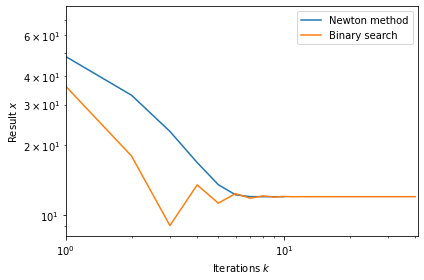

In [6]:
# input parameters
x = 144
b = 2
tol = 10**-9
print("Find the root of %s to the power of %s." % (x, b))

# run optimization
res_nwt = root_newton(x, b, tol)
res_bin = root_binary(x, b, tol)

# evaluation
truth = x**(1/b)
print("Newton: %s w/ %s diverg. after %d iterations" % (res_nwt[-1], res_nwt[-1] - truth, len(res_nwt)))
print("Binary: %s w/ %s diverg. after %d iterations" % (res_bin[-1], res_bin[-1] - truth, len(res_bin)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.loglog(range(len(res_nwt)), res_nwt, label='Newton method')
plt.loglog(range(len(res_bin)), res_bin, label='Binary search')
plt.xlim([1, max(len(res_nwt), len(res_bin))])
plt.xlabel('Iterations $k$')
plt.ylabel('Result $x$')
plt.legend()

plt.tight_layout()

if False:
    plt.savefig('./img/univar_loss_plot.png')